# TSNE Analysis

In [1]:
from ensemble_analysis import EnsembleAnalysis
from tsne_utils import unit_vector_distance

## Download from PED and Load Data

In [2]:
ens_codes = [
    "PED00423e001",
    "PED00424e001",
    "PED00160e001"
]
data_dir = 'C:/Users/nikol/Documents/test_dir/ped'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='ped')

https://deposition.proteinensemble.org/api/v1/entries/PED00423/ensembles/e001/ensemble-pdb
Download complete. Saved to: C:\Users\nikol\Documents\test_dir\ped\PED00423e001.tar.gz
Downloaded file PED00423e001.tar.gz from PED.
Extracted file PED00423e001.pdb.
https://deposition.proteinensemble.org/api/v1/entries/PED00424/ensembles/e001/ensemble-pdb
Download complete. Saved to: C:\Users\nikol\Documents\test_dir\ped\PED00424e001.tar.gz
Downloaded file PED00424e001.tar.gz from PED.
Extracted file PED00424e001.pdb.
https://deposition.proteinensemble.org/api/v1/entries/PED00160/ensembles/e001/ensemble-pdb
Download complete. Saved to: C:\Users\nikol\Documents\test_dir\ped\PED00160e001.tar.gz
Downloaded file PED00160e001.tar.gz from PED.
Extracted file PED00160e001.pdb.


In [3]:
analysis.generate_trajectories()

Generating trajectory from PDB file: C:\Users\nikol\Documents\test_dir\ped\PED00423e001.pdb.
Saving trajectory.
Generating trajectory from PDB file: C:\Users\nikol\Documents\test_dir\ped\PED00424e001.pdb.
Saving trajectory.
Generating trajectory from PDB file: C:\Users\nikol\Documents\test_dir\ped\PED00160e001.pdb.
Saving trajectory.


## Featurization

In [5]:
analysis.perform_feature_extraction(featurization='phi_psi')

Performing feature extraction for Ensemble: PED00423e001.
Transformed ensemble shape: (1000, 182)
Performing feature extraction for Ensemble: PED00424e001.
Transformed ensemble shape: (1000, 182)
Performing feature extraction for Ensemble: PED00160e001.
Transformed ensemble shape: (500, 182)
Feature names: ['SER2-PHI', 'MET3-PHI', 'THR4-PHI', 'PRO5-PHI', 'SER6-PHI', 'THR7-PHI', 'PRO8-PHI', 'PRO9-PHI', 'ARG10-PHI', 'SER11-PHI', 'ARG12-PHI', 'GLY13-PHI', 'THR14-PHI', 'ARG15-PHI', 'TYR16-PHI', 'LEU17-PHI', 'ALA18-PHI', 'GLN19-PHI', 'PRO20-PHI', 'SER21-PHI', 'GLY22-PHI', 'ASN23-PHI', 'THR24-PHI', 'SER25-PHI', 'SER26-PHI', 'SER27-PHI', 'ALA28-PHI', 'LEU29-PHI', 'MET30-PHI', 'GLN31-PHI', 'GLY32-PHI', 'GLN33-PHI', 'LYS34-PHI', 'THR35-PHI', 'PRO36-PHI', 'GLN37-PHI', 'LYS38-PHI', 'PRO39-PHI', 'SER40-PHI', 'GLN41-PHI', 'ASN42-PHI', 'LEU43-PHI', 'VAL44-PHI', 'PRO45-PHI', 'VAL46-PHI', 'THR47-PHI', 'PRO48-PHI', 'SER49-PHI', 'THR50-PHI', 'THR51-PHI', 'LYS52-PHI', 'SER53-PHI', 'PHE54-PHI', 'LYS55-PHI

In [6]:
rg = analysis.rg_calculator()
len(rg)

2500

## Dimensionality Reduction

In [7]:
analysis.fit_dimensionality_reduction(method='tsne', perplexityVals = [10, 50, 90], metric=unit_vector_distance)

tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


tsne file for the perplexity value of 10 is saved in C:\Users\nikol\Documents\test_dir\ped\dim_reduction 
tsne file for the perplexity value of 50 is saved in C:\Users\nikol\Documents\test_dir\ped\dim_reduction 
tsne file for the perplexity value of 90 is saved in C:\Users\nikol\Documents\test_dir\ped\dim_reduction 
tsne is done! All files saved in C:\Users\nikol\Documents\test_dir\ped\dim_reduction


In [8]:
analysis.cluster(range_n_clusters=range(2,10,1))

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluste

## Test Entire Pipeline

In [1]:
from ensemble_analysis import EnsembleAnalysis

ens_codes = [
    "PED00423e001",
    "PED00424e001",
]
data_dir = 'C:/Users/nikol/Documents/test_dir'

featurization_params = {'featurization': 'phi_psi'}
reduce_dim_params = {'method': 'tsne', 'perplexityVals': range(500,1001,500), 'metric' : 'euclidean'}
range_n_clusters = range(2,10,1)

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.execute_pipeline(featurization_params, reduce_dim_params, range_n_clusters)

Trajectory already exists for ensemble PED00423e001. Loading trajectory.
Trajectory already exists for ensemble PED00424e001. Loading trajectory.
Performing feature extraction for Ensemble: PED00423e001.
Transformed ensemble shape: (1000, 182)
Performing feature extraction for Ensemble: PED00424e001.
Transformed ensemble shape: (1000, 182)
Feature names: ['SER2-PHI', 'MET3-PHI', 'THR4-PHI', 'PRO5-PHI', 'SER6-PHI', 'THR7-PHI', 'PRO8-PHI', 'PRO9-PHI', 'ARG10-PHI', 'SER11-PHI', 'ARG12-PHI', 'GLY13-PHI', 'THR14-PHI', 'ARG15-PHI', 'TYR16-PHI', 'LEU17-PHI', 'ALA18-PHI', 'GLN19-PHI', 'PRO20-PHI', 'SER21-PHI', 'GLY22-PHI', 'ASN23-PHI', 'THR24-PHI', 'SER25-PHI', 'SER26-PHI', 'SER27-PHI', 'ALA28-PHI', 'LEU29-PHI', 'MET30-PHI', 'GLN31-PHI', 'GLY32-PHI', 'GLN33-PHI', 'LYS34-PHI', 'THR35-PHI', 'PRO36-PHI', 'GLN37-PHI', 'LYS38-PHI', 'PRO39-PHI', 'SER40-PHI', 'GLN41-PHI', 'ASN42-PHI', 'LEU43-PHI', 'VAL44-PHI', 'PRO45-PHI', 'VAL46-PHI', 'THR47-PHI', 'PRO48-PHI', 'SER49-PHI', 'THR50-PHI', 'THR51-PHI', 

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446

## Analysis

[10.0, 2.0]
[   0    2    3 ... 2491 2494 2499] 0
[   1   12   25 ... 2496 2497 2498] 1


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


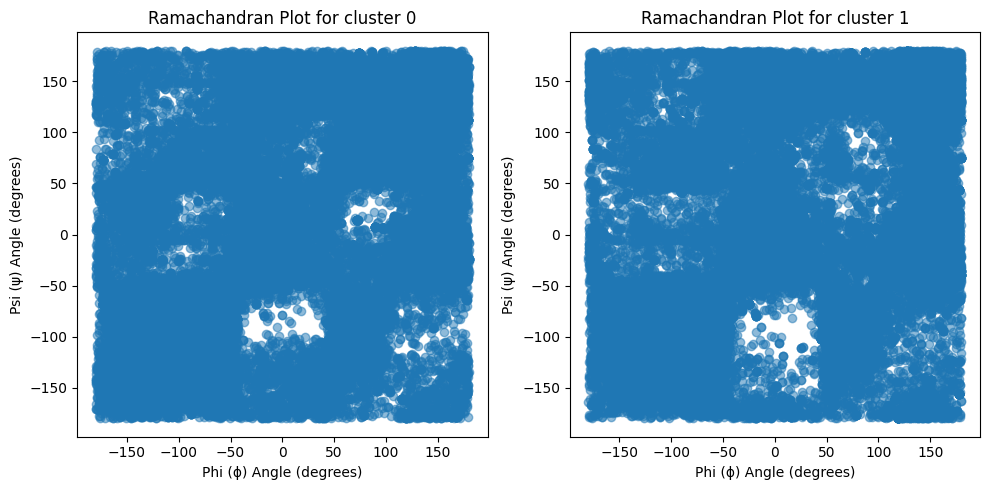

In [9]:
analysis.tsne_ramachandran_plot()

[10.0, 2.0]
[   0    2    3 ... 2491 2494 2499]
[   1   12   25 ... 2496 2497 2498]


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


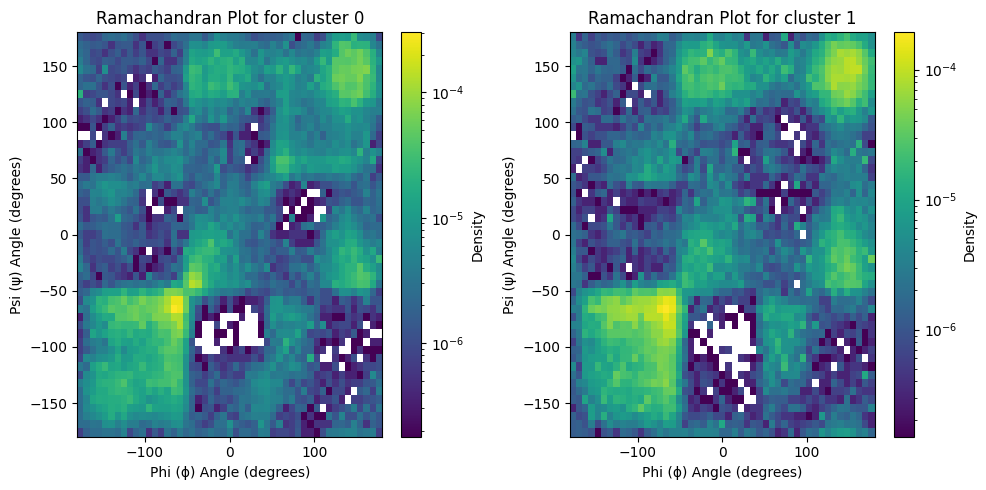

In [10]:
analysis.tsne_ramachandran_plot_density()

10.0 2.0


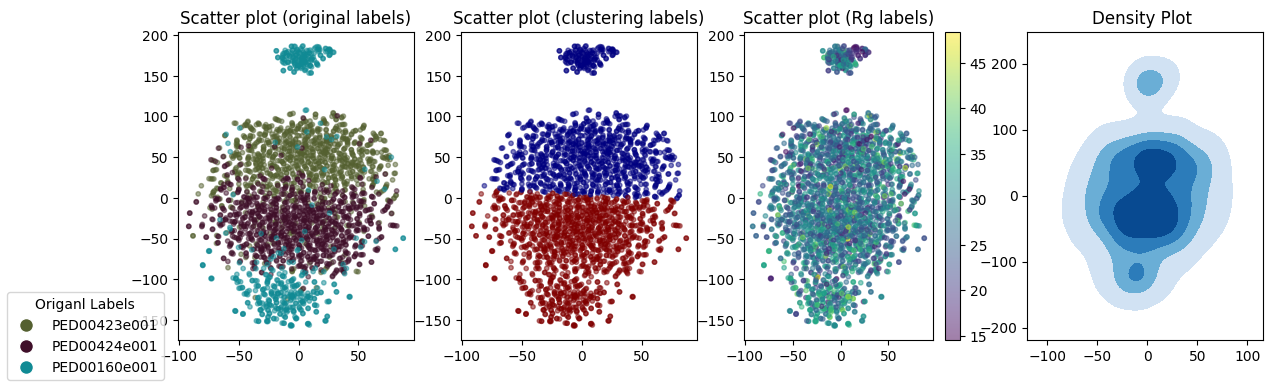

In [11]:
analysis.tsne_scatter_plot()

In [12]:
analysis.tsne_scatter_plot_2()

10.0 2.0
